In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from table_reader import TableReader
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso, ElasticNet

Hey folks, I'm just trying out a proof-of-concept jupyter notebook that uses our data retrieval code.

I got sick of working with environment variables so I switched to a new method to store our DB password:
    1. Create a file called config.json in the project root.
    2. Inside, config.json should look like this:
    {
        "database_url":"database_url_goes_here"
    }

TableReader's other vector methods are geodata_vector() and reviews_vector(). Be sure to call close() when you're done so it terminates the connection to the DB.

In [14]:
tr = TableReader()
df = tr.properties_vector(include_amenitites=True)
tr.close()

In [15]:
features = df[df.columns.drop(['price', 'listingID'])]
label = df['price']

In [16]:
model = ElasticNet()
esfm = SelectFromModel(model)
esfm.fit(features, label)
print(list(features.iloc[:, esfm.get_support(indices=True)]))

['accomodates', 'bathrooms', 'bedrooms', 'Serviced apartment', 'Entire home/apt', 'Private room', 'Shared room', 'Free street parking', 'Family/kid friendly', 'Elevator', 'Dryer', 'Free parking on premises', 'Self check-in', 'Washer', 'First aid kit', 'Gym', 'Internet', 'Lock on bedroom door', 'Indoor fireplace', 'Cable TV', 'TV', 'Fire extinguisher', 'Pool']


In [5]:
model = Lasso()
sfm = SelectFromModel(model)
sfm.fit(features, label)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['accomodates', 'bathrooms', 'bedrooms', 'Serviced apartment', 'Entire home/apt', 'Shared room', 'Dryer', 'Self check-in', 'First aid kit', 'Elevator', 'Family/kid friendly', 'TV', 'Free street parking', 'Free parking on premises', 'Cable TV', 'Internet', 'Gym', 'Indoor fireplace', 'Lock on bedroom door']


In [6]:
model = Ridge()
sfm = SelectFromModel(model)
sfm.fit(features, label)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['bathrooms', 'bedrooms', 'Apartment', 'Condominium', 'Guest suite', 'House', 'Serviced apartment', 'Townhouse', 'Entire home/apt', 'Shared room', 'Dishes and silverware', 'Elevator', 'Oven', 'TV', 'Refrigerator', 'Smart lock', 'Extra pillows and blankets', 'Free street parking', 'Free parking on premises', 'Bathtub', 'Gym', 'Hot tub', 'Indoor fireplace']


In [17]:
elastic_data = df[list(features.iloc[:, esfm.get_support(indices=True)])]

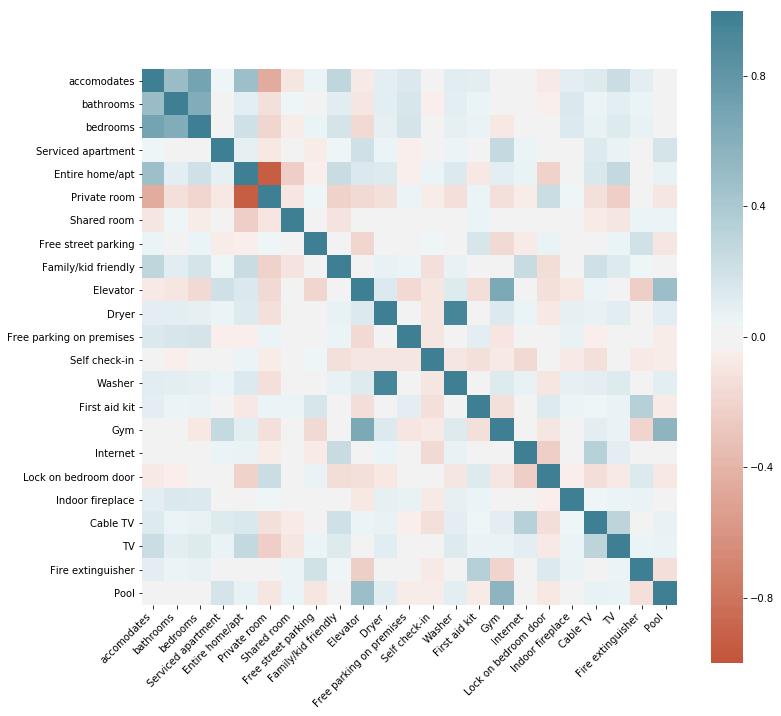

In [18]:
corr = elastic_data.corr()
plt.figure(figsize=(12, 12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

1. Feature Selection

Chi-squared (chi²) statistical test for non-negative features to select 20 of the best features from the Mobile Price Range Prediction Dataset.

In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 20 best features
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(features,label)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

                    Specs        Score
0             accomodates  4182.805494
12            Shared room  3562.161252
11           Private room  2338.639850
3                    beds  2282.643948
2                bedrooms  1703.326123
8      Serviced apartment  1617.581016
10        Entire home/apt  1323.337616
73                   Pool  1152.489301
58                    Gym  1135.608306
16                Bathtub  1033.628165
29                Hot tub  1025.131564
34               Elevator   815.988801
39  Wheelchair accessible   806.710766
50                   Oven   760.496541
32    Family/kid friendly   734.473870
7                   House   728.354252
71           Pets allowed   718.182247
67               Cable TV   676.059273
1               bathrooms   656.021416
25             Dishwasher   637.031893


2. Feature Importance Model

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.066183   0.03077436 0.039198   0.04789548 0.01479723 0.01039382
 0.00486022 0.01252709 0.00190656 0.01172373 0.00545874 0.00466528
 0.00254527 0.02285936 0.00809266 0.02438146 0.00387924 0.0109317
 0.00610855 0.00102861 0.00591566 0.00539345 0.00445292 0.00944626
 0.02296546 0.00158052 0.00612391 0.00270679 0.00283486 0.00670299
 0.00614366 0.02636945 0.01879084 0.00900337 0.01138369 0.00243954
 0.01231835 0.00451322 0.02814338 0.00451593 0.02639196 0.01347165
 0.0080022  0.01692439 0.00546281 0.00880343 0.0086364  0.00551811
 0.01236177 0.02181775 0.00093008 0.02704685 0.00948858 0.02013715
 0.01197364 0.00299349 0.01312918 0.03048696 0.00850305 0.00513299
 0.0077748  0.02635315 0.00345805 0.023263   0.02332724 0.01283004
 0.01975173 0.02307055 0.01472637 0.00558911 0.02858211 0.0215202
 0.00142793 0.00915868]


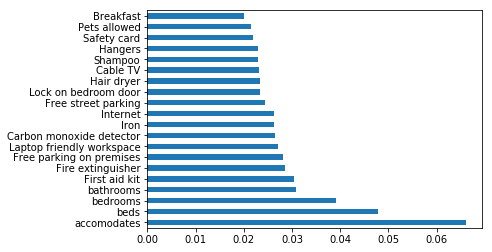

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(features,label)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()